# MULTIPLE LINEAR REGRESSION. 

A supervised machine learning technique that uses multiple variables to predict an outcome. Just a like linear regression, this statistical model attempts to model a relationship between variables along a straight line. A linear relatioship follows a straight line. A multiple linear regressor attempts to study the relationship between multiple independent variables and one dependent variable. This tutorial attempts to map the relationship between voter election turnout 2020(target) and various predictors such as population, median age and historical voter turn out in the United States. This region of interest was chosen because of ease of availabilty of data and the potential political impact, informed parties can make informed decisions that prove to be the edge over rivals. 

## How To Use A Linear Model.
Formula : 

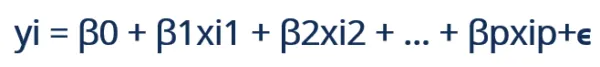

Where : 

* **yi** - Dependent variable 
* **β0** - y intercept 
* **β1 & β2** - regression coefficients, representing a change in y when xi1 and xi2 are changed by one unit
* **xip** - independent variables 
* **βp** - slope coefficient 

<center><img src="../images/Linear_reg2.jpg" width=800px height=500px /></center>


A linear regression model takes the form of an equation line that passes through a set of data points represented in a scatter plot. This is aline that bests represent the overal direction of points, assumptions must be made, since a single line cannot pass through all of them. In order to plot such a line we need to have two things ;

* A point at which the lines starts in the Y axis - This a value when X(predictor) is 0, commonly refered to ass constant or intercept.   
* The gradient / slope coefficient - 

Python attempst to estimate these values by minimising the distance between the line an all points using least squares estimation. The model will provides coefficient values for each variable thus elucidate the impact of each of them providing a deeper understandanding that will serve as a foundation for other complex models. A linear regression model is easy to implement and doesn not act like a black box like neural networks. 


## Data Source.
Data was collected from MIT Election data hub (https://dataverse.harvard.edu/). Data contains various meterics aggregated at county level. There were more than 20 variables but only 4 were selected for this study. In the upcoming tutorials, many more will be incoorperated into other complex machine learning algorithsm such as random forest, knn and gradient boost. 

<center><img src="../images/Linear_reg3.jpg" width=800px height=500px /></center>





## Assumptions in a linear model. 

1. The relationship between two variables must be linear. Else data should be transfomed or non-linear regression used. 
2. Independent variables should not be highly correlated, or show multi-collinearity. This ensures that its easy to figure out the variance a specific independent variable has over the dependent one. 
3. The variance of error in residuals is constant at each point of the model. Residual is actual value of y minus predicted value. We should plot the standardized residuals against the predicted values to determine if the points are distributed fairly across all the values of independent variables
4. All observations should be independent of one another. This means that the residuals should be independent.
5. Residuals have a multivariate normality where they are normally distributed. 



# 1. Data Preparation. 

In [16]:
# Import Modules.

import pandas as pd 
import geopandas as gpd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mapclassify                        # For map classification scheme 


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [50]:
# Load data path
path = 'F:/Programs/Secrets of ML/Data/US_Elections.gpkg'

# Read data containing county polygons. 
data = gpd.read_file(path, layer='US_CountyElections_clean')

# Geodata properties 
print(f'Coordinate reference system : {data.crs} \n--------------\n\n\
      dataframe type : {type(data)}')

Coordinate reference system : EPSG:3857 
--------------

      dataframe type : <class 'geopandas.geodataframe.GeoDataFrame'>


In [52]:
# Subset data 
data = data[['name', 'population', '2022_median_age', 'voter_turnout_2016', 'voter_turnout_2020', 'geometry' ]]

# View 
print(f'Column names : {data.columns} \n----------\n\
      Observations : {data.info(verbose=True)} \n----------\n\
      Data distribution : \n {data.describe().round(2)}\n')



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   name                3108 non-null   object  
 1   population          3108 non-null   int64   
 2   2022_median_age     3108 non-null   float64 
 3   voter_turnout_2016  3108 non-null   float64 
 4   voter_turnout_2020  3108 non-null   float64 
 5   geometry            3108 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 145.8+ KB
Column names : Index(['name', 'population', '2022_median_age', 'voter_turnout_2016',
       'voter_turnout_2020', 'geometry'],
      dtype='object') 
----------
      Observations : None 
----------
      Data distribution : 
         population  2022_median_age  voter_turnout_2016  voter_turnout_2020
count      3108.00          3108.00             3108.00             3108.00
mean     105939.71            

# 2. Visualise choropleth map. 

Sometimes choropleths exist as part of larger figures that may include more choropleths. In some cases, each of them can be best considered as an independent map. Lets create a single map figure containing pooled classifications of all variables to be studied in single map but all consistent.  

In [53]:
# Scale median age and population data to have a common scale. 

# Select unscaled data 
data2 = data[['population', '2022_median_age']]
# Scale ALL numeric data through normalisation 
scaleMinMax = MinMaxScaler(feature_range=(0, 1))  # Scaler ensures values should range between 0 and 1 

data2 = scaleMinMax.fit_transform(data2)

# Create a dataframe of scaled data 
data2 = pd.DataFrame(data2, columns=['population', '2022_median_age'])
data2

,population,2022_median_age
0,0.005866,0.397163
1,0.023138,0.496454
2,0.002512,0.427896
3,0.002220,0.413712
4,0.005899,0.449173
...,...,...
3103,0.004215,0.312057
3104,0.002323,0.397163
3105,0.002036,0.321513
3106,0.000761,0.494090


Sample data : 
    population  2022_median_age            name  voter_turnout_2016  \
0    0.005866         0.397163  Autauga County            0.604600   
1    0.023138         0.496454  Baldwin County            0.598103   

   voter_turnout_2020                                           geometry  
0            0.632502  MULTIPOLYGON (((-9619464.071 3856528.446, -961...  
1            0.627867  MULTIPOLYGON (((-9742872.755 3543445.886, -974...   
 ------------
 


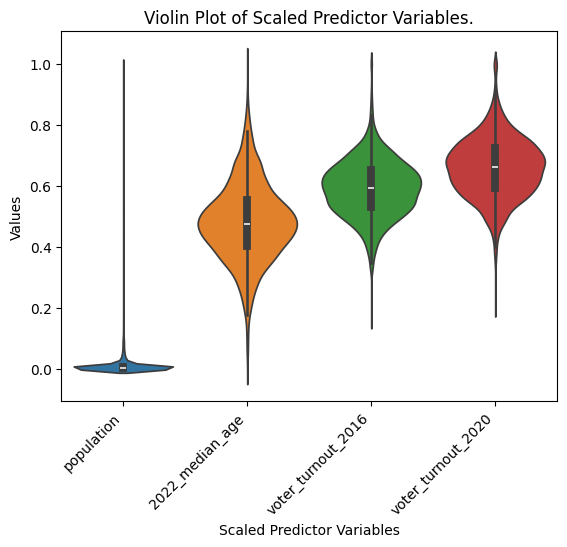

In [54]:
# Merge data and plot a vioilin showing distribution 

# Drop column to be scaled from original dataframe 
scaled_data = data.drop(['population', '2022_median_age'], axis=1)

# Merge remaining columns with scaled data 
scaled_data = pd.concat([data2, scaled_data], axis=1)

# Create geodataframe
scaled_data = gpd.GeoDataFrame(scaled_data, crs="EPSG:3857", geometry=scaled_data.geometry)

# Sample data
print(f'Sample data : \n {scaled_data.head(2)} \n ------------\n ')

# Plot scaled data 
sns.violinplot(data=scaled_data)
plt.xticks(rotation=45, ha='right')

# Title and labels
plt.title('Violin Plot of Scaled Predictor Variables.')
plt.xlabel('Scaled Predictor Variables')
plt.ylabel('Values')

plt.show()

In [55]:
# List the columns we need to visualise 
map_variables = ['population', '2022_median_age', 'voter_turnout_2016', 'voter_turnout_2020']

# Create pooled classification
pooled = mapclassify.Pooled(scaled_data[map_variables], classifier="Quantiles", k=5)

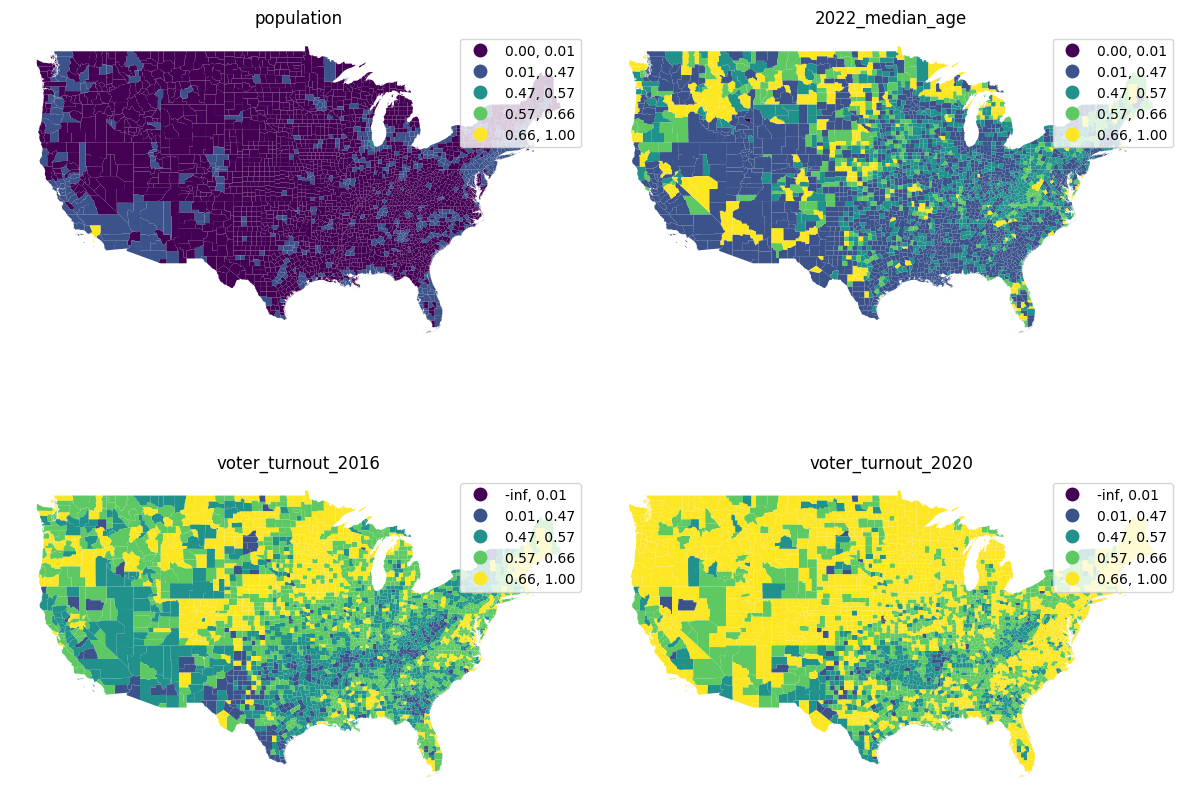

In [60]:
# Set up figure with four axis
f, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the array of axis so you can loop over in one dimension
axs = axs.flatten()

# Loop over each variable 
for i, y in enumerate(map_variables):
    
    # Plot data 
    scaled_data.plot(   y,                      # Column to plot
                        ax=axs[i],              # Plot on the corresponding axis
                        scheme="UserDefined",   # Use our own bins
                        classification_kwds={ 
                            "bins": pooled.global_classifier.bins },       # Use global bins
                        legend=True             # Add a legend
    )

    # Remove axis
    axs[i].set_axis_off()

    # Name the subplot with the name of the column
    axs[i].set_title(y)


# Tight layout to better use space
plt.tight_layout()
# Display figure
plt.show()

## Prediction Model One.

Predict 2020 voter turn out using three training features , 2022 median age, 2022 per caital income and 2022 percentage of people above 25 years and with high diploma. Voter turn out are the labels. 

In [15]:
# Subset data 
data1 = data[['2022_median_age', '2022_per_capitalincome', 'perc_2022_age_25+_no_diploma/highschool', 'voter_turnout_2020']]
data1

,2022_median_age,2022_per_capitalincome,perc_2022_age_25+_no_diploma/highschool,voter_turnout_2020
0,39.1,32233.0,7.53,0.632502
1,43.3,37891.0,5.77,0.627867
2,40.4,22826.0,16.10,0.535949
3,39.8,25152.0,12.53,0.542704
4,41.3,28176.0,9.49,0.632245
...,...,...,...,...
3107,35.5,37688.0,3.64,0.555581
3108,39.1,58009.0,1.93,0.855977
3109,35.9,32885.0,3.11,0.665892
3110,43.2,30448.0,4.82,0.672560


In [17]:
# Check null values 
data1.isna().sum()

2022_median_age                            0
2022_per_capitalincome                     0
perc_2022_age_25+_no_diploma/highschool    0
voter_turnout_2020                         0
dtype: int64

In [22]:
# Define training features by creating feature variables 
X = data1.drop(columns='voter_turnout_2020')
print(f'Training features : \n {X.head()}')

# Define labels 
y = data1[['voter_turnout_2020']]
print(f'\n Labels : \n {y.head()}')

Training features : 
    2022_median_age  2022_per_capitalincome  \
0             39.1                 32233.0   
1             43.3                 37891.0   
2             40.4                 22826.0   
3             39.8                 25152.0   
4             41.3                 28176.0   

   perc_2022_age_25+_no_diploma/highschool  
0                                     7.53  
1                                     5.77  
2                                    16.10  
3                                    12.53  
4                                     9.49  

 Labels : 
    voter_turnout_2020
0            0.632502
1            0.627867
2            0.535949
3            0.542704
4            0.632245


In [25]:
# Split the data into training(70%) and testing data(30%) ,pick random rows and sp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=23)
 
# Create a linear regression model by importing the class 
model1 = LinearRegression()

# Train the model, fit the model , it gain knowledge of the data statistics 
model1.fit(X_train, y_train)

LinearRegression()

In [29]:
# intercepts and coefficients , these values are used in prediction 
# Coefficients can provide the basis for a crude feature importance score. This assumes that the 
# input variables have the same scale or have been scaled prior to fitting a model.

c = model1.intercept_
m = model1.coef_

print(f'y-intercept = {c} \n regression coefficient of each variable : {m}')


# 2022_median_age and 2022_per_capitalincome had the highest importance, meaning they had the largest influence
# in predicting voter turn out. perc_2022_age_25+_no_diploma/highschool had the least impportance, -7.78386521e-03. 
# Try scalling the values and see the output. 


y-intercept = [0.28919679] 
 coefficient of each variable : [[ 6.75042451e-03  4.19717610e-06 -7.78386521e-03]]


Feature: 0, Score: 0.00675
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00778


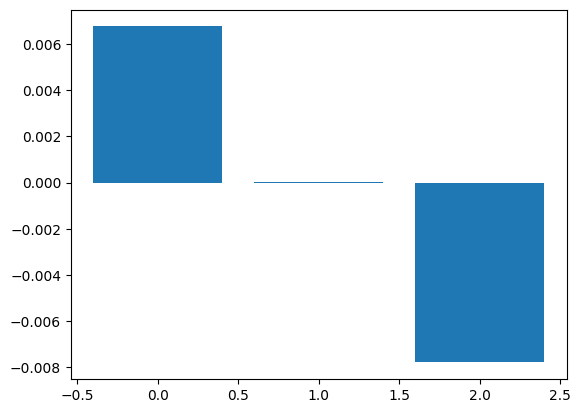

In [54]:
# summarize feature importance
for i,v in enumerate(m.flatten()):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(m.flatten()))], m.flatten())
plt.show()

In [ ]:
# Evaluate the model metrics , know hpow well or model performed 

# Model can be evaluated using mean sqaure error and mean absolute error by comparing with the mean of the 
# target variable.
#  mean_squared_error is the mean of the sum of residuals. mean_absolute_error is the mean of the absolute errors 
# of the model. The less the error, the better the model performance is.

print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 


In [30]:
# Predict voter turn out with training data , train the model the based on the training dataset 

y_pred_train = model1.predict(X_train)
y_pred_train

array([[0.5494032 ],
       [0.65166813],
       [0.63955588],
       ...,
       [0.63111002],
       [0.68105187],
       [0.67233377]])

Text(0, 0.5, 'Predicted Voter Turnout')

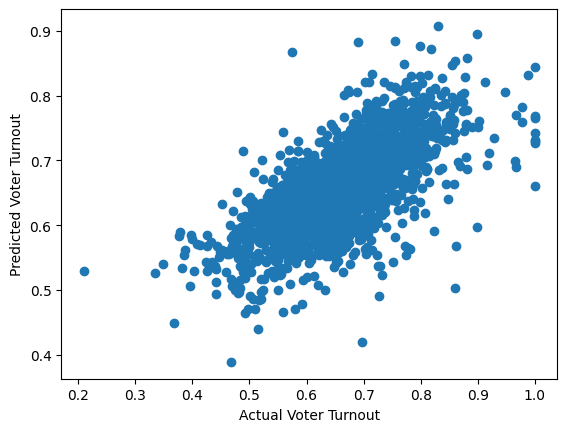

In [36]:
# Evaluate how well the model predicted its own data 

# Bestfit line
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Voter Turnout")
plt.ylabel("Predicted Voter Turnout")

In [38]:
# From visually analysising the graph, the modell performed quite good but we can better understand performance 
# using R2 score which tell how close the data fitted into the regression line. 
# It tells the proportion of variance in the dependent variable that can be explained by the independent variable 
r2_score(y_train, y_pred_train) 


0.4838351638729127

Test the model on test dataset.

Text(0, 0.5, 'Predicted Voter Turnout')

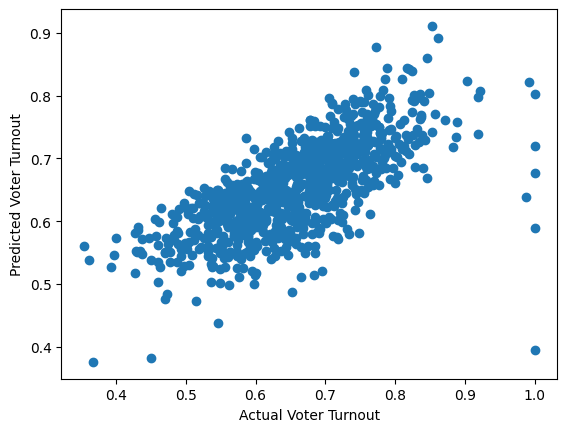

In [40]:
# Predict using validating dataset, an unseen data 
y_pred_test = model1.predict(X_test)

# plot
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Voter Turnout")
plt.ylabel("Predicted Voter Turnout")
plt.title('ACTUAL VS PREDICTED TURNOUT')

In [41]:
# Variability 
r2_score(y_test, y_pred_test)

0.49443562079699

In [48]:
pred_y_df = pd.DataFrame({'Actual Voter Turnout':y_test , 'Predicted Voter TurnOut':y_pred_test.flatten(), 'Difference': y_test - y_pred_test})
pred_y_df[0:20]

ValueError: Data must be 1-dimensional, got ndarray of shape (934, 1) instead

[0.67316958 0.60594442 0.61068528 0.66057793 0.76854235 0.58338356
 0.63048161 0.65886433 0.5594414  0.64449107 0.5604699  0.62040068
 0.75353908 0.64864678 0.54880879 0.56879221 0.61575675 0.75234435
 0.69311373 0.59899892 0.64904023 0.62457854 0.69923216 0.61811474
 0.63293642 0.7189917  0.61487946 0.72945362 0.70192015 0.71712895
 0.66129361 0.67351583 0.61029171 0.6018817  0.62205468 0.67096919
 0.75200439 0.71783813 0.47197628 0.62364899 0.71479596 0.78723379
 0.77373906 0.63028942 0.68511083 0.51451543 0.75089515 0.68983274
 0.69465272 0.61329564 0.71826971 0.763956   0.76835558 0.67740887
 0.68455586 0.55049816 0.58727171 0.71525364 0.65014701 0.69107603
 0.61534729 0.61191075 0.71340753 0.58616499 0.55325783 0.60177931
 0.73274011 0.58522064 0.71469139 0.73504029 0.7761621  0.69321755
 0.67702433 0.67176745 0.60932867 0.61872057 0.70620928 0.66405056
 0.61186906 0.63388716 0.55259679 0.60905157 0.53449765 0.57884756
 0.67327758 0.72368462 0.65457668 0.58077681 0.67673459 0.7023

# References 

1. Feature importance - https://machinelearningmastery.com/calculate-feature-importance-with-python/